# **Prediction of Diabetes Likelihood Based on Health Indicators in a Pima Indian woman**

## **Introduction**

### **Data**

Diabetes is a chronic health condition that affects the body’s ability to produce insulin which allows humans to break down sugar and convert it into energy (Centers for Disease Control and Prevention, 2023). There are three main types of diabetes type 1, type 2, and gestational (pregnant) with type 2 being the most common: almost 95% of cases. Research from the National Institute of Health claims “you are more likely to develop type 2 diabetes if you are not physically active and are overweight or have obesity” (National Institute of Diabetes and Digestive and Kidney Diseases, 2016). Our research focuses on the Pima people, North American Indians who traditionally lived along the Gila and Salt rivers in Arizona, U.S. and specifically women over 20 years of age. The dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases. It aims to predict whether a patient has diabetes using diagnostic measurements. The data includes the variables Pregnancies (number of pregnancies), Glucose (Blood glucose level), BloodPressure (Blood Pressure Measurement), SkinThickness (A measure of thickness of skin, zero if missing), Insulin (Insulin in blood level), BMI (Body Mass Index), DiabetesPedigreeFunction (Diabetes percentage likely observed in the patients pedigree), and Age (Age greater than or equal to 21). The final variable Outcome is a dummy variable (1 for having diabetes, 0 otherwise). Currently, Outcome is represented as an integer but in our data wrangling we plan to change it into a factor variable. In the data set there are a total of 768 observations.

| Column                   | Description                                       | Data Type  | Range                      |
|--------------------------|---------------------------------------------------|------------|----------------------------|
| Pregnancies              | Number of pregnancies                             | Integer    | 0 to 17                    |
| Glucose                  | Glucose level in blood (mg/dL)                    | Integer    | 0 to 199                   |
| BloodPressure            | Blood pressure measurement (mm Hg)                | Integer    | 0 to 122                   |
| SkinThickness            | Thickness of the skin (mm)                        | Integer    | 0 to 99                    |
| Insulin                  | Insulin level in blood (mu U/ml)                  | Integer    | 0 to 846                   |
| BMI                      | Body mass index (kg/m^2)                          | Numeric    | 0.0 to 67.1                |
| DiabetesPedigreeFunction| Diabetes percentage (no units, ratio)              | Numeric    | 0.078 to 2.42              |
| Age                      | Age (years)                                       | Integer    | 21 to 81                   |
| Outcome                  | Dummy Variable (1 is has diabetes, 0 is does not) | Integer    | 0 or 1                     |


### **Research Questions**

How good are the variables in our data set at predicting whether or not a Pima Indian woman over the age of 20 has diabetes or not?  What is the likelihood of diabetes in a Pima Indian woman over the age of 20 with glucose level 140, BMI measure of 32.5, DPF measure of 1.6, and age of 43? 

For this question, the explanatory variables will be pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, diabetes pedigree function (DPF) and age. The variables include relevant health information about a patient that could influence the outcome variable of having diabetes. Naturally, we would need to create a correlation map to deal with issues of multicollinearity and model selection later to address overfitting the model with unnecessary variables. In the meantime, we will include all of the variables in the data set (minus outcome) as explanatory variables. The response variable will be outcome and because this is represented as a dummy variable, we will be able to treat the predicted value as a likelihood of having diabetes. 


## **Methods and Results**

### **Exploratory Data Analysis (EDA)**

In [1]:
install.packages("infer")
install.packages("faraway")
install.packages("mltools")
install.packages("leaps")
install.packages("cowplot")
install.packages("caret")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(tidyverse)
library(broom)
library(repr)
library(infer)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(cowplot)
library(GGally)
library(boot)
library(caret)
library(pROC)
library(boot)
library(glmnet)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [3]:
#Demonstrate data set can be read from web into R 
raw_diabetes <- read_csv('https://raw.githubusercontent.com/alex-haddon/stat301_project/main/diabetes.csv')
head(raw_diabetes)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 6           148     72            35              0     33.6
2 1            85     66            29              0     26.6
3 8           183     64             0              0     23.3
4 1            89     66            23             94     28.1
5 0           137     40            35            168     43.1
6 5           116     74             0              0     25.6
  DiabetesPedigreeFunction Age Outcome
1 0.627                    50  1      
2 0.351                    31  0      
3 0.672                    32  1      
4 0.167                    21  0      
5 2.288                    33  1      
6 0.201                    30  0

In [4]:
#Clean and Wrangle Data

#Change Columnn Names
colnames(raw_diabetes)<- c("pregnancies","glucose","bloodpressure", "skinthickness", "insulin", "bmi", "DPF", "age", "outcome")
#Change Outcome to factor variable
raw_diabetes$outcome <- as.factor(raw_diabetes$outcome)
#Reorder Columns
diabetes <- raw_diabetes %>% select(outcome, everything())
#Remove NA values from rows
diabetes <- diabetes %>%
    filter(glucose != 0) %>% #filter out unobserved glucose levels
    filter(bloodpressure != 0) %>% #filter out unobserved blood pressure levels
    filter(skinthickness != 0) %>% #filter out unobserved skin thickness
    filter(insulin != 0) %>% #filter out unobserved insulin levels
    filter(bmi != 0) #filter out unobserved bmi measurements

head(diabetes)
nrow(diabetes) #number of rows left after filtering out zeros 

outcome pregnancies glucose bloodpressure skinthickness insulin bmi  DPF  
1 0       1            89     66            23             94     28.1 0.167
2 1       0           137     40            35            168     43.1 2.288
3 1       3            78     50            32             88     31.0 0.248
4 1       2           197     70            45            543     30.5 0.158
5 1       1           189     60            23            846     30.1 0.398
6 1       5           166     72            19            175     25.8 0.587
  age
1 21 
2 33 
3 26 
4 53 
5 59 
6 51

[1] 392

Here we are only using 392 observations of the initial 768. This is because we removed the observations where the variables glucose, blood pressure, skin thickness, insulin, and bmi are equal to zero. We know these were unobserved entries because a value of zero would mean the person is dead. Since we plan on using all of these variables in our regression, it is important that the observations that would skew the estimates are eliminated.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


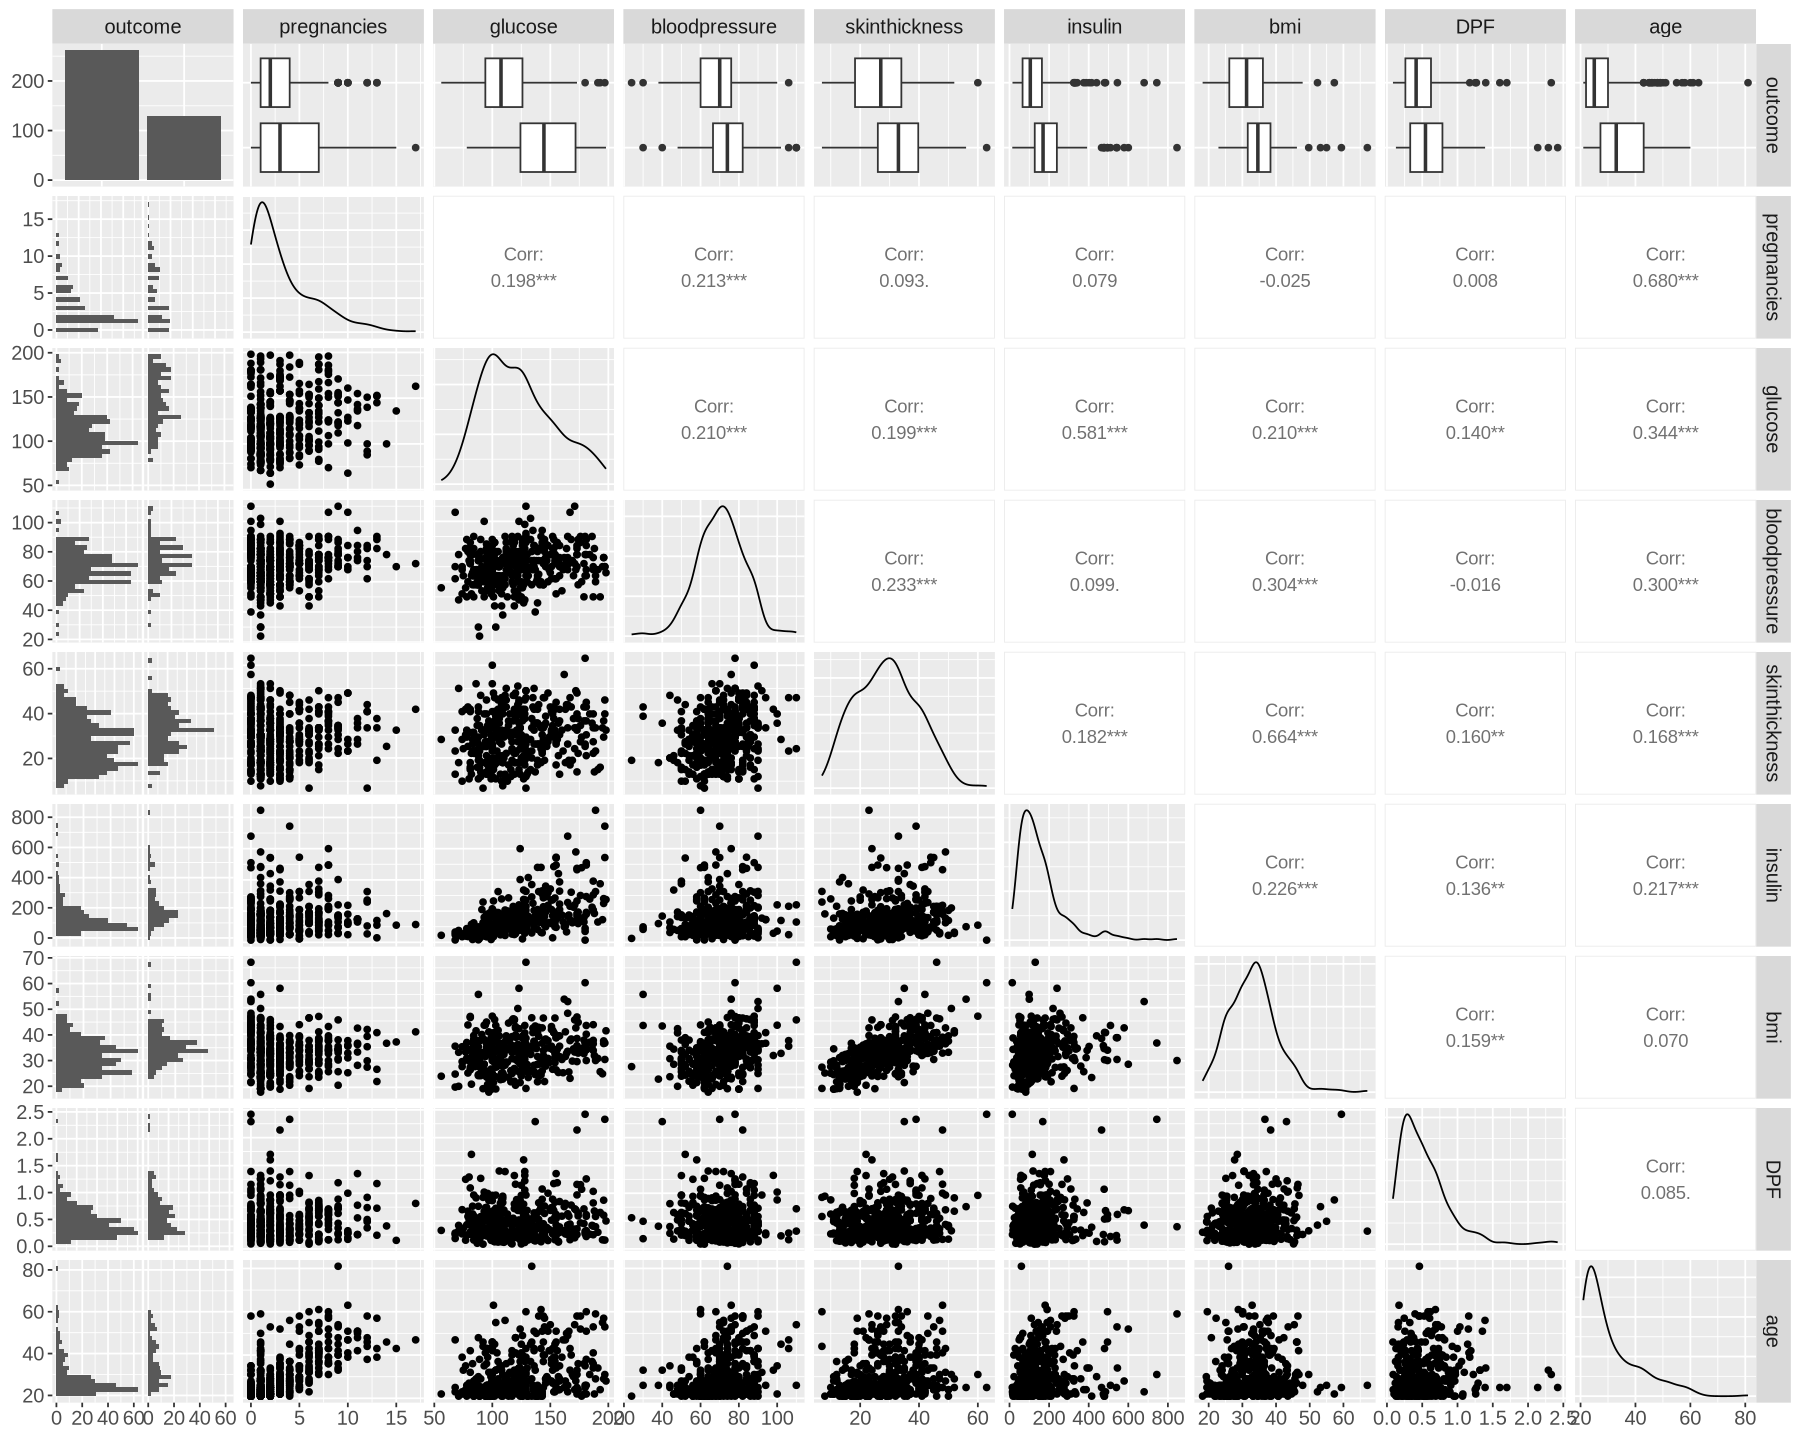

In [5]:
#Pair Plots
options(repr.plot.width = 15, repr.plot.height = 12)

diabetes_pairplots <- diabetes %>%
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"))

diabetes_pairplots

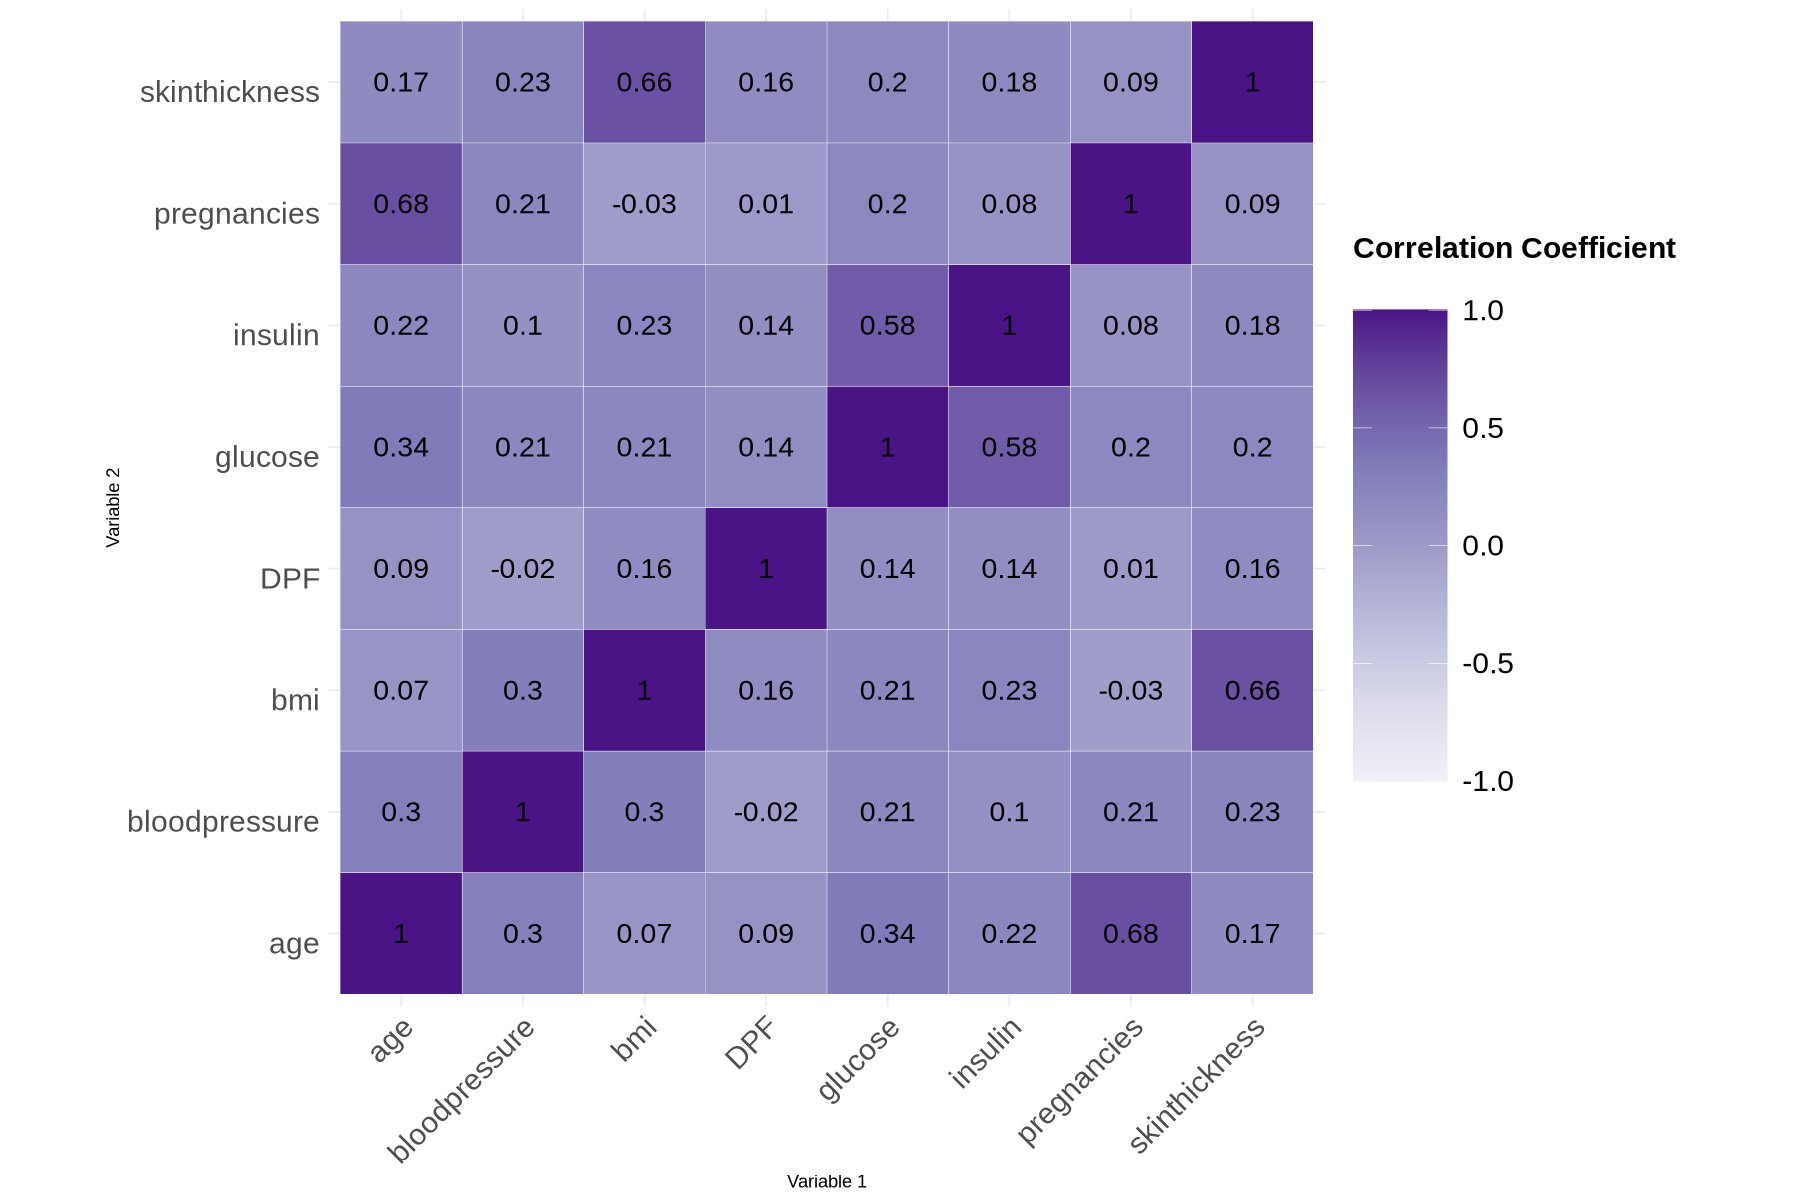

In [6]:
#Correlation Matrix of Input Variables

corr_matrix_diabetes <- diabetes %>%
  select(- outcome) %>% 
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr")

options(repr.plot.width = 15, repr.plot.height = 10)

plot_corr_matrix_diabetes <- corr_matrix_diabetes %>%
  ggplot(aes(x = var1, y = var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette =  "Purples",
    direction = 1, limits = c(-1,1)
  ) +
  labs(x = "Variable 1", y = "Variable 2") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 18, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1
    ),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(x = var1, y = var2, label = round(corr, 2)), color = "black", size = 6)
plot_corr_matrix_diabetes

By visualizing the correlation matrix and pairplots, we can identify which variables are correlated with each other. This map helps us identify potential multicollinearity issues when controlling for multiple variables simultaneously in our future regression analysis. From the map, it seems like skin thickness and BMI are highly correlated as well as pregnancies and age. Looking forward, these correlations will help us decide which variables to include or exclude from our regression, ensuring that only relevant variables are considered. 


TableGrob (4 x 2) "arrange": 7 grobs
              z     cells    name           grob
pregnancies   1 (1-1,1-1) arrange gtable[layout]
glucose       2 (1-1,2-2) arrange gtable[layout]
bloodpressure 3 (2-2,1-1) arrange gtable[layout]
insulin       4 (2-2,2-2) arrange gtable[layout]
bmi           5 (3-3,1-1) arrange gtable[layout]
DPF           6 (3-3,2-2) arrange gtable[layout]
age           7 (4-4,1-1) arrange gtable[layout]

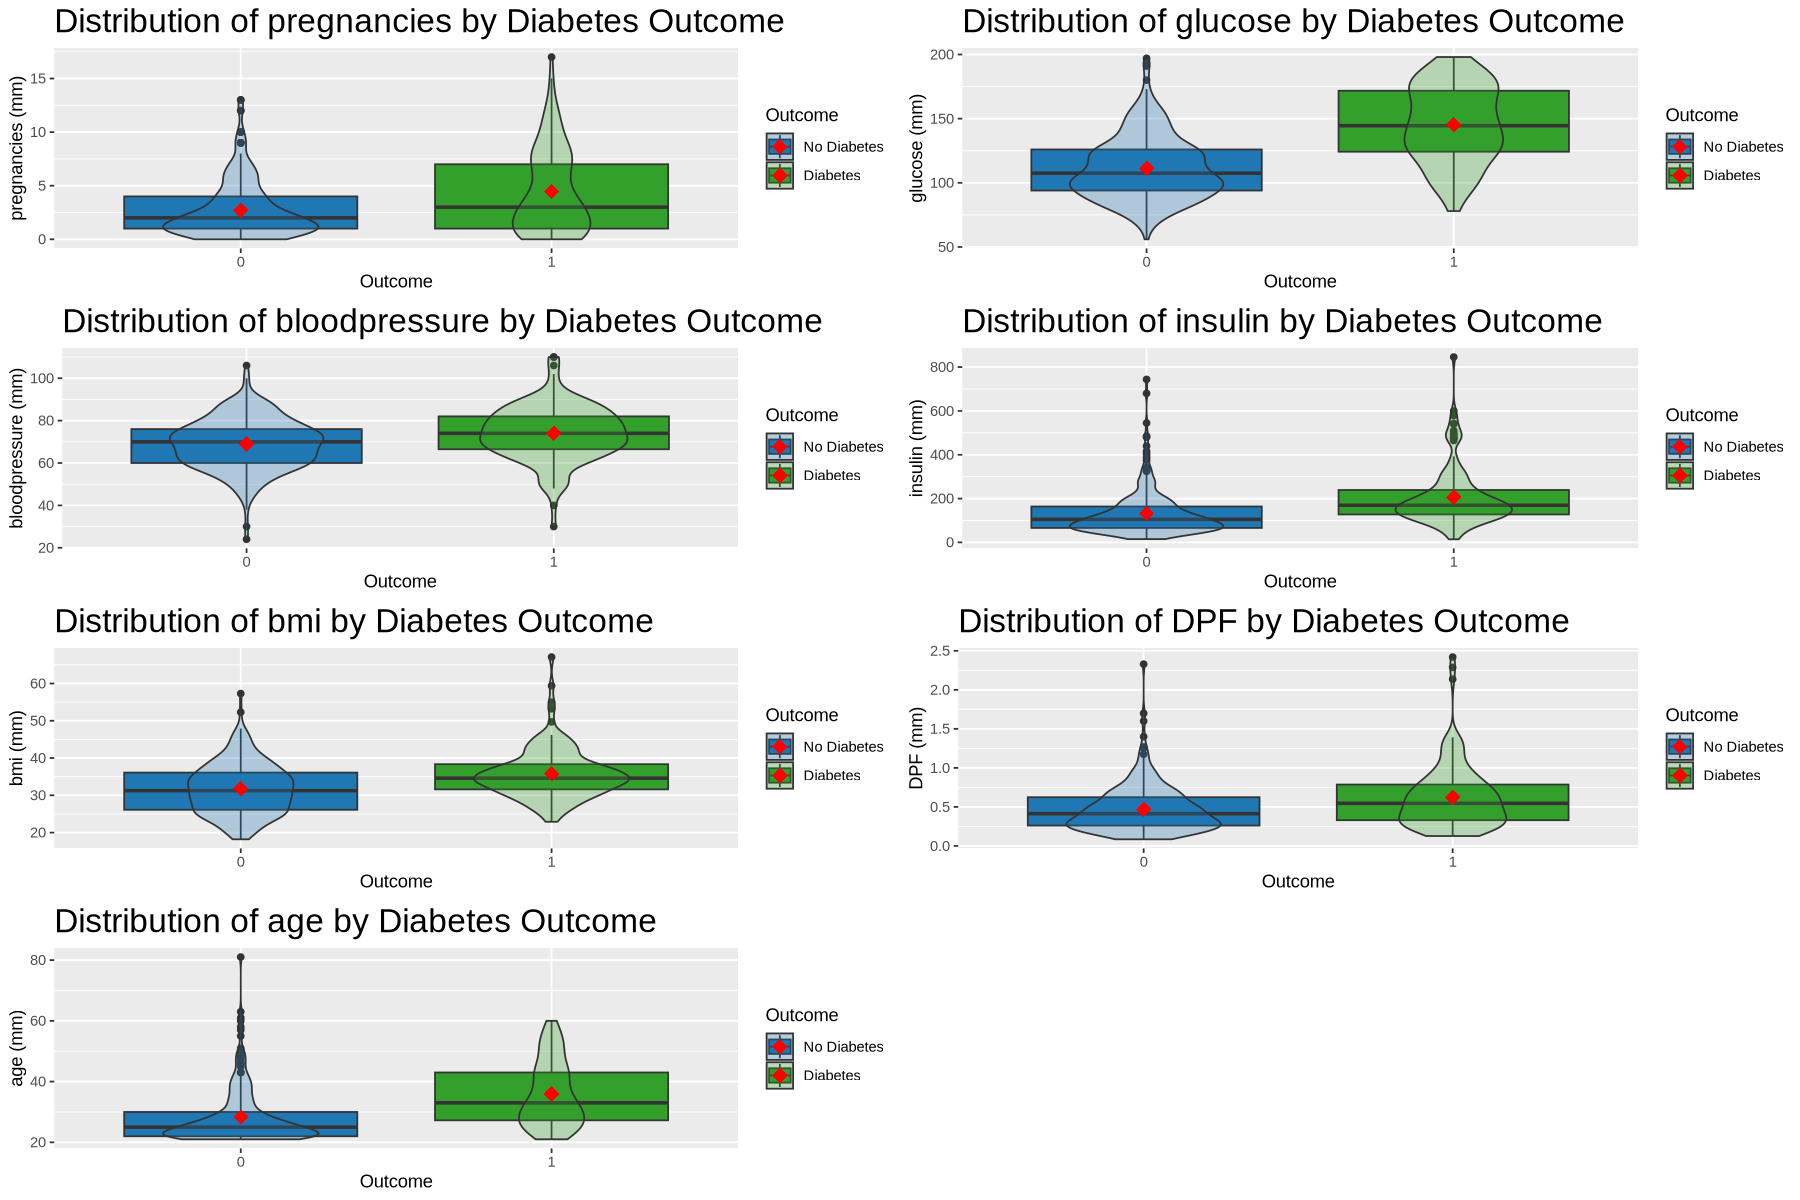

In [7]:
# Visualizations for other variables
variables <- c('pregnancies', 'glucose', 'bloodpressure', 'insulin', 'bmi', 'DPF', 'age')

# Create a list to store individual ggplot objects
plots_list <- list()

for (variable in variables) {
  plot <- ggplot(diabetes, aes(x = outcome, y = !!sym(variable), fill = outcome)) +
    geom_boxplot() +
    geom_violin(width=0.5, alpha = 0.3) +
    stat_summary(fun = mean, geom = "point", shape = 18, size = 4, color = "red") +
    labs(x = "Outcome", y = paste0(variable, " (mm)"), title = paste0("Distribution of ", variable, " by Diabetes Outcome")) +
    scale_fill_manual(values = c("#1f78b4", "#33a02c"), name = "Outcome", labels = c("No Diabetes", "Diabetes")) + 
    theme(plot.title = element_text(size = 20)) 
  plots_list[[variable]] <- plot
}

# Combine plots using facet grid
facet_grid_plot <- do.call(gridExtra::grid.arrange, c(plots_list, ncol = 2))

facet_grid_plot

The boxplot serves as a visualization for exploring the association between the explanatory variables and the likelihood of diabetes among Pima Indian women over 20. By segregating the data into diabetic and non-diabetic groups, it is a direct comparison of the distribution of the explanatory variables between these two groups. We also plotted the means, which as we can see are very close to the median, which implies that there aren't outliers which pull the mean far away from the median. This comparison enables the identification of potential differences in central tendency and variability in each explanatory variable, which may indicate an association with diabetes probability. Moreover, the inclusion of the distribution assists in detecting outliers within each group, which is useful in understanding extreme values that could influence the relationship under investigation. The reason we chose the box plot is because of the nature of the response variable output. Because it is a dummy variable of either 1 or 0, a scatter plot wouldn't be very useful as all the points would be 1 or 0 and therefore no meaningful analysis could be done from observing the plot. Here however, there is a noticeable difference in the distribution of the glucose, age, and insulin of those with and without diabetes and those with diabetes. While we have not performed statistical analysis yet, this difference is visually represented. 


### **Methods: Plan**

Upon review of the exploratory analysis we decided to apply a logistic regression model to the data, aiming to predict the presence of diabetes based on the health indicators in the data. These variables served as predictors for the binary target variable – that is, diabetes presence. This method was appropriate in this scenario for a variety of reasons. Firstly, the target variable is binary in nature. Logistic regression is quite similar to linear regression in the sense that it learns weights associated with each feature as well as the bias – however, it goes a step further by applying a threshold on the raw output to decide whether the outcome should be positive or negative. This additional step that allowed us to deal with binary outcomes makes logistic regression the best fit for my research question. Another reason we chose to use logistic regression is that it is easily interpretable. The coefficients obtained from the model can be interpreted as the change in the outcome for a one-unit change in the predictor variable. This made it straightforward to understand the impact of each predictor on the likelihood of having diabetes. Furthermore, logistic regression can handle situations where there are irrelevant predictors in the model. If certain predictors I selected do not contribute significantly to the prediction of diabetes presence, logistic regression can still provide valid estimates for the remaining relevant predictors.


#### **Model assumptions**

Logistic regression assumes that the outcome variable is binary, as it is the case with presence or absence of diabetes. It further assumes that observations are independent of each other – this independence assumption is crucial for ensuring the validity of parameter estimates and statistical tests. Moreover, logistic regression assumes that there is little or no multicollinearity among the predictor variables, as this can make it difficult to estimate the independent effects of each variable and can lead to unreliable model results. Additionally, the model tends to perform better on large sample sizes and when there is an absence of outliers in the data.


#### **Model and feature selection**

Backward selection was employed to refine the predictive model. It began with the full set of predictors and iteratively removed the least significant variables until the model's performance plateaued. This iterative approach was crucial for model and feature selection as it enabled the identification of the most influential predictors while simultaneously mitigating the risk of overfitting by removing redundant or less informative variables. By systematically evaluating and refining the predictor set, both forward and backward selection methods facilitated the creation of a parsimonious and robust predictive model, enhancing its generalizability and interpretability.


#### **Model evaluation**

For evaluating the performance of the logistic regression model, we used the ROC Curve (Receiver Operating Characteristic Curve). The ROC curve provides a graphical representation of the performance of the model across different threshold settings. It plots the true positive rate against the false positive rate, allowing for a visual assessment of the trade-off between the two. The area under the ROC curve (AUC) summarizes the overall performance of the model, with higher AUC values indicating better discrimination between positive and negative instances.

#### **Computational code**

In [8]:
set.seed(1234)

train_index <- createDataPartition(diabetes$outcome, p = 0.7, list = FALSE)

# Create training and testing datasets
training_diabetes <- diabetes[train_index, ]
testing_diabetes <- diabetes[-train_index, ]

# Fitting a logistic regression model
diabetes_logit_model <- glm(outcome ~ pregnancies + glucose + bloodpressure + skinthickness + insulin + bmi + DPF + age, 
                                        data = training_diabetes, 
                                        family = binomial)

summary(diabetes_logit_model)

# Forward selection code
diabetes_forward_selection_model <- regsubsets(
  outcome ~ pregnancies + glucose + bloodpressure + skinthickness + insulin + bmi + DPF + age, 
  nvmax = 8,
  data = training_diabetes,
  method = "forward"
)


# Summary of forward selection
diabetes_forward_selection_summary<- summary(diabetes_forward_selection_model)
diabetes_forward_selection_summary

# Evaluating the forward selection model
diabetes_forward_selection_model_df <- tibble(
    n_input_variables = 1:8,
    RSQ = diabetes_forward_selection_summary$rsq,
    RSS = diabetes_forward_selection_summary$rss,
    ADJ.R2 = diabetes_forward_selection_summary$adjr2,
    Cp = diabetes_forward_selection_summary$cp,
    BIC = diabetes_forward_selection_summary$bic,
)
diabetes_forward_selection_model_df



Call:
glm(formula = outcome ~ pregnancies + glucose + bloodpressure + 
    skinthickness + insulin + bmi + DPF + age, family = binomial, 
    data = training_diabetes)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0902  -0.6293  -0.3434   0.5837   2.3514  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.179e+01  1.615e+00  -7.305 2.77e-13 ***
pregnancies    9.072e-02  6.993e-02   1.297 0.194542    
glucose        4.549e-02  8.048e-03   5.652 1.58e-08 ***
bloodpressure  7.029e-04  1.416e-02   0.050 0.960414    
skinthickness  1.810e-03  2.098e-02   0.086 0.931272    
insulin       -2.034e-03  1.641e-03  -1.239 0.215246    
bmi            9.120e-02  3.430e-02   2.659 0.007848 ** 
DPF            2.171e+00  6.053e-01   3.587 0.000334 ***
age            3.310e-02  2.309e-02   1.434 0.151677    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Nu

Subset selection object
Call: regsubsets.formula(outcome ~ pregnancies + glucose + bloodpressure + 
    skinthickness + insulin + bmi + DPF + age, nvmax = 8, data = training_diabetes, 
    method = "forward")
8 Variables  (and intercept)
              Forced in Forced out
pregnancies       FALSE      FALSE
glucose           FALSE      FALSE
bloodpressure     FALSE      FALSE
skinthickness     FALSE      FALSE
insulin           FALSE      FALSE
bmi               FALSE      FALSE
DPF               FALSE      FALSE
age               FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         pregnancies glucose bloodpressure skinthickness insulin bmi DPF age
1  ( 1 ) " "         "*"     " "           " "           " "     " " " " " "
2  ( 1 ) " "         "*"     " "           " "           " "     " " "*" " "
3  ( 1 ) " "         "*"     " "           " "           " "     " " "*" "*"
4  ( 1 ) " "         "*"     " "           " "           " "     "*" "*" "*"
5 

n_input_variables RSQ       RSS      ADJ.R2    Cp        BIC      
1 1                 0.2749205 44.14812 0.2722645 35.456526 -77.17179
2 2                 0.3115478 41.91798 0.3064856 21.975905 -85.80976
3 3                 0.3414484 40.09741 0.3341582 11.338345 -92.40382
4 4                 0.3645333 38.69184 0.3551190  3.581462 -96.59993
5 5                 0.3685973 38.44439 0.3568612  3.863802 -92.74751
6 6                 0.3704245 38.33314 0.3563295  5.091536 -87.92770
7 7                 0.3706332 38.32043 0.3541329  7.003334 -82.40210
8 8                 0.3706411 38.31995 0.3517130  9.000000 -76.78878

[1] "glucose" "bmi"     "DPF"     "age"

glucose bmi  DPF   age outcome
1 197     30.5 0.158 53  1      
2 166     25.8 0.587 51  1      
3 103     43.3 0.183 33  0      
4 143     36.6 0.254 51  1      
5 125     31.1 0.205 41  1      
6  97     23.2 0.487 22  0

glucose bmi  DPF   age outcome
1  89     28.1 0.167 21  0      
2 137     43.1 2.288 33  1      
3  78     31.0 0.248 26  1      
4 189     30.1 0.398 59  1      
5 118     45.8 0.551 31  1      
6 115     34.6 0.529 32  1

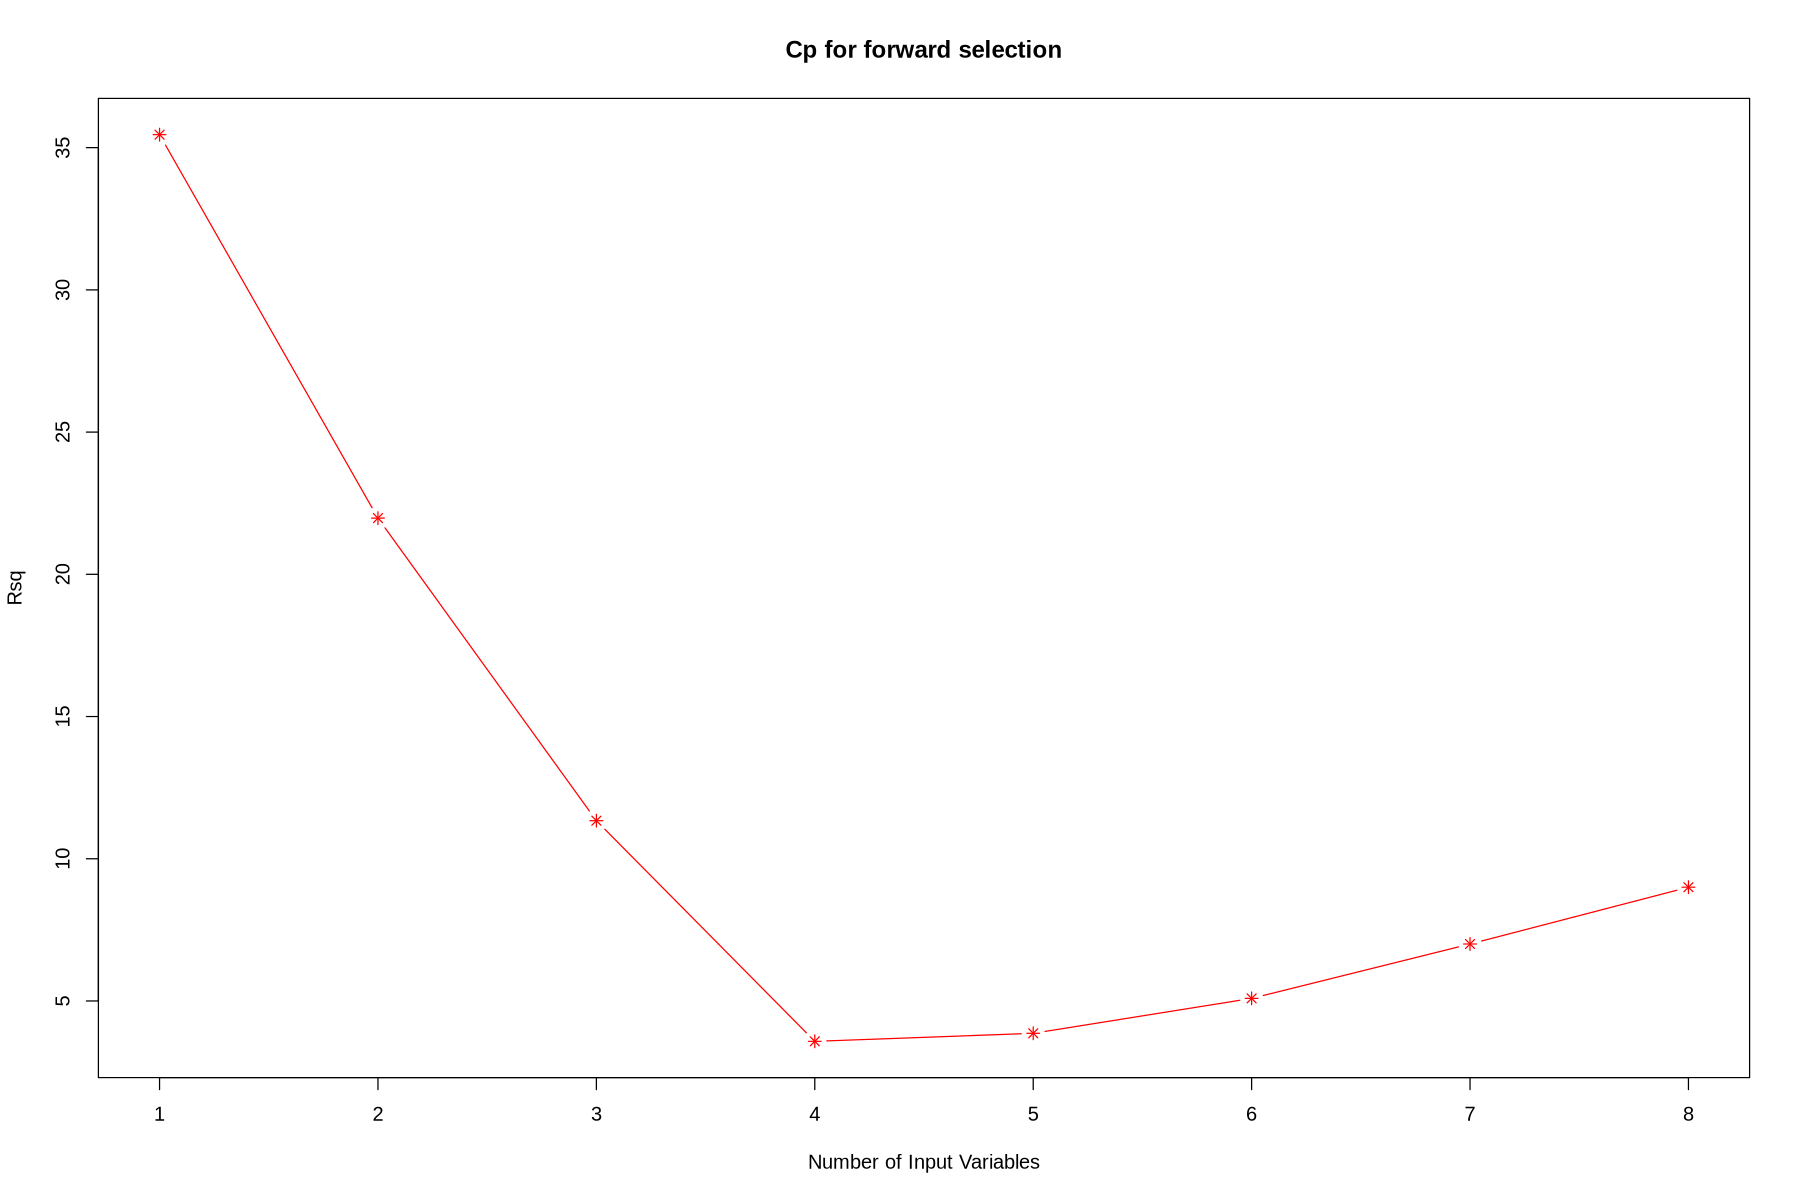

In [9]:
# Cp model
plot(summary(diabetes_forward_selection_model)$cp,
  main = "Cp for forward selection",
  xlab = "Number of Input Variables", ylab = "Rsq", type = "b", pch = 8,
  col = "red"
)

# Getting the names of selected variables
cp_min = which.min(diabetes_forward_selection_summary$cp) 
selected_var <- names(coef(diabetes_forward_selection_model, cp_min))[-1]
selected_var

# New training and testing datasets with reduced variables based on forward selection
diabetes_training_subset <- training_diabetes %>% select(all_of(selected_var), outcome)
diabetes_testing_subset <- testing_diabetes %>% select(all_of(selected_var), outcome)

head(diabetes_training_subset)
head(diabetes_testing_subset)

In [13]:
# Train Reduced Logistic Model

diabetes_model_reduced <- glm(formula = outcome ~., data = diabetes_training_subset, family = binomial)
summary(diabetes_model_reduced)


Call:
glm(formula = outcome ~ ., family = binomial, data = diabetes_training_subset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0570  -0.6364  -0.3521   0.5711   2.3167  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -11.301997   1.408461  -8.024 1.02e-15 ***
glucose       0.040136   0.006715   5.977 2.27e-09 ***
bmi           0.082863   0.025777   3.215 0.001307 ** 
DPF           2.005808   0.588707   3.407 0.000656 ***
age           0.053403   0.016810   3.177 0.001489 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 349.15  on 274  degrees of freedom
Residual deviance: 232.96  on 270  degrees of freedom
AIC: 242.96

Number of Fisher Scoring iterations: 5


In [14]:
diabetes_training_subset <- mutate(diabetes_training_subset, outcome = ifelse(outcome == 1, 1, 0))
diabetes_testing_subset <- mutate(diabetes_testing_subset, outcome = ifelse(outcome == 1, 1, 0))

head(diabetes_training_subset)
head(diabetes_testing_subset)

glucose bmi  DPF   age outcome
1 197     30.5 0.158 53  1      
2 166     25.8 0.587 51  1      
3 103     43.3 0.183 33  0      
4 143     36.6 0.254 51  1      
5 125     31.1 0.205 41  1      
6  97     23.2 0.487 22  0

glucose bmi  DPF   age outcome
1  89     28.1 0.167 21  0      
2 137     43.1 2.288 33  1      
3  78     31.0 0.248 26  1      
4 189     30.1 0.398 59  1      
5 118     45.8 0.551 31  1      
6 115     34.6 0.529 32  1

In [15]:
# Misclassification Rate Using Test Data using 10 Fold Cross Validation

# Cut-off of 0.5 for prediction

misclassification_rate <- function(y, p.hat){
    y_hat <- round(p.hat, 0)
    error_rate <- mean(abs(y - y_hat))
    return(error_rate)
}

error_rate_train <- 
    misclassification_rate(diabetes_training_subset$outcome, predict(diabetes_model_reduced, type = "response"))

error_rate_train

# 10 fold cross validation for test set
cv_logistic <- 
    cv.glm(
        glmfit = diabetes_model_reduced, 
        data = diabetes_testing_subset, 
        K = 10, 
        cost = misclassification_rate)

cv_logistic$delta[1]

[1] 0.2036364

Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”
Warning message in y - y_hat:
“longer object length is not a multiple of shorter object length”


[1] 0.4358974

Setting levels: control = 0, case = 1

Setting direction: controls < cases



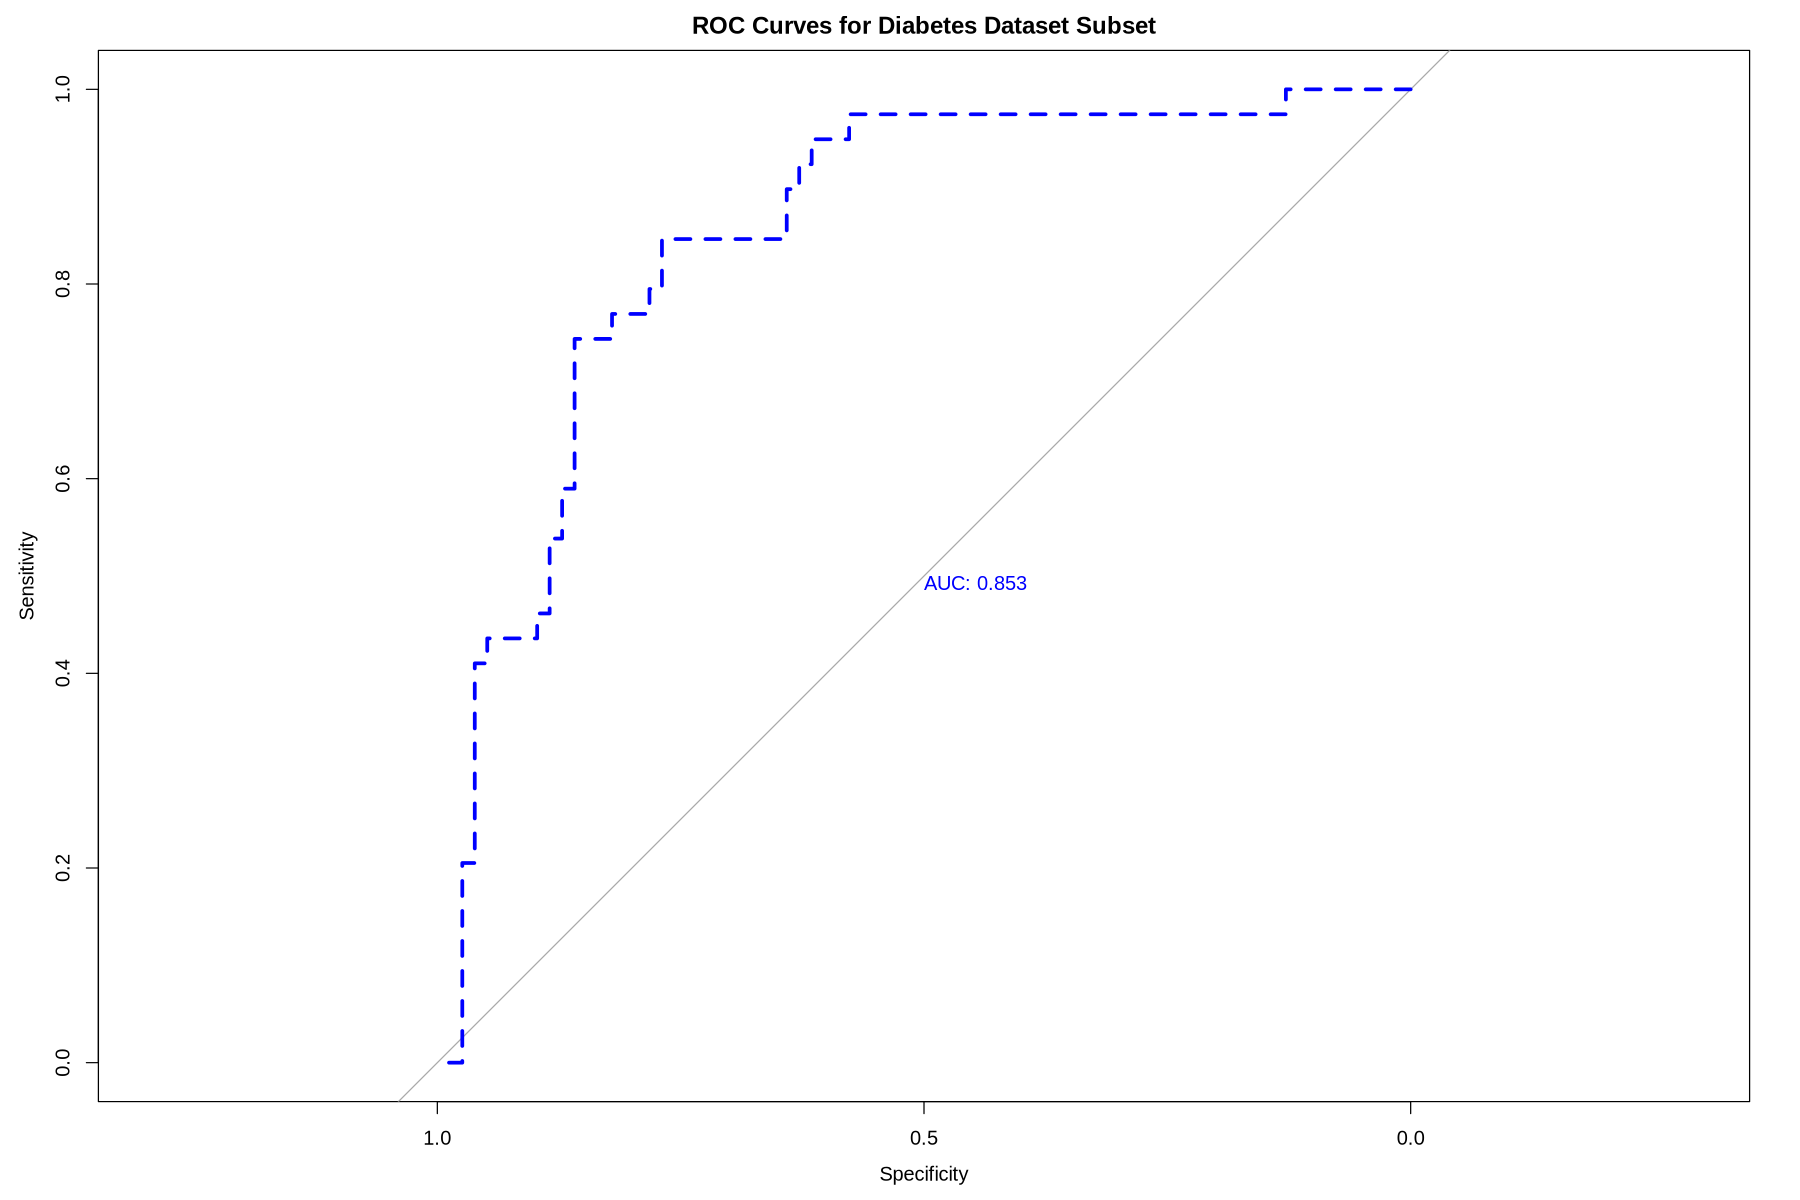

In [16]:
# Plotting the ROC curve as a measure of predictive performance

ROC_full_log <- roc(
  response = diabetes_testing_subset$outcome,
  predictor = predict(diabetes_model_reduced, newdata = diabetes_testing_subset, type = "response"))

plot(ROC_full_log,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for Diabetes Dataset Subset")

In [18]:
# Predict a Pima Indian woman over the age of 20 with glucose level 140, bmi measure of 32.5, DPF measure of 1.5, and age of 43?

estimated_prob <- predict(diabetes_model_reduced,
    tibble(glucose = 140, bmi = 32.5, DPF = 1.5, age = 43), type = "response")

estimated_prob

1 
0.9101262

##### After performing forward selection, we limited the predictor variables in our model to glucose, BMI, diabetes pedigree function, and age. 

The diabetes dataset was split into test and training datasets, with 70% of the data being assigned to the training set and the remaining percentage to the test set. Beyond using the training set to train the logistic regression model, it was also employed to calculate the training error rate of our model, which was 20.4%%. In other words, the model's predictions did not perfectly match the actual outcomes for about 20.4% of the training data points. While this error rate may seem high, it's important to consider the context of the problem and the complexity of the data. 
Predicting diabetes based on health indicators is complex due to the multifactorial nature of the disease, involving genetic, environmental, and lifestyle factors, alongside the challenge of capturing interactions among predictors. If the training error rate is high, it may indicate that the model is too complex and is overfitting to the training data, capturing noise rather than true patterns. Evaluating the training error rate provides insight into how well the model fits the training data, but it's equally important to assess the model's performance on unseen data (i.e., the testing dataset) to gauge its generalization ability. 

This is why a 10-fold cross validation of the logistic regression model was implemented, providing an estimate of the predictive model's performance based on multiple iterations of training and testing across different subsets of the data. In this instance, the average CV score of 43.5% indicates that, on average, the model incorrectly predicts the outcome for approximately 43.5% of the data points across the ten folds. 

The logistic regression analysis revealed certain factors are strong indicators of diabetes risk; specifically, higher levels of glucose, high BMI, a high result from the diabetes pedigree function, and a high age. For example, each one-unit rise in BMI, the odds of diabetes increased by a factor of 0.08. The present analysis did not find any non statistically significant association between our reduced model explanatory variables. The AUC of the model is calculated at 0.853, indicating that the model performs better than a random classifier, which would have an AUC measure of 0.5.

Lastly, we applied our model to predict the likelihood of diabetes in a Pima Indian woman over the age of 20 with with glucose level 140, bmi measure of 32.5, DPF measure of 1.5, and age of 43. Based on our output, we predict that such an individual would have a 91% chance of having diabetes.

## **Discussion**

Our research aimed to assess the likelihood of diabetes in Pima Indian women over the age of 20 based on various health indicators. By employing a logistic regression model and refining it through forward selection, we determined that glucose levels, BMI, diabetes pedigree function (DPF), and age are significant predictors of diabetes.

The model's training error rate and the 10-fold cross-validation scores provided a robust evaluation of our predictive model's performance. Although specific rates are not mentioned, these measures help us understand the model's reliability. We found that higher glucose levels and BMI significantly increase the odds of diabetes, aligning with the existing literature that highlights these factors as key risk elements for the disease. Surprisingly, despite the expectations set by prior studies, our model did not indicate blood pressure as a significant predictor. This could suggest the need for further investigation or might reflect limitations in our dataset or model. Additionally, we could have changed the cut-off prediction rate which currently was set at 0.5. Doing so, would change or misclassification error but would change our interpretation of the classification.

While the findings are promising, the model could be improved by addressing potential biases that might arise from the dataset, such as the exclusion of observations where certain health indicators were unrecorded. Furthermore, incorporating interaction terms or polynomial features might capture more complex relationships between the predictors and the response variable.

In terms of future research, this study opens several avenues. One could look into genetic factors that were not captured in the dataset but could provide a more comprehensive understanding of diabetes risk. Additionally, expanding the dataset to include more diverse populations could enhance the model's generalizability. Longitudinal studies might also reveal how the likelihood of diabetes evolves over time with changes in health indicators.

Lastly, our predictive model is a step toward personalized medicine, where a patient's specific characteristics can inform their individual risk profile. As machine learning techniques advance, incorporating such models into clinical decision-making tools could significantly impact diabetes prevention and management strategies.

## **References**

Centers for Disease Control and Prevention. “What Is Diabetes?” CDC.gov, 5 Sept. 2023, www.cdc.gov/diabetes/basics/diabetes.html.

National Institute of Diabetes and Digestive and Kidney Diseases. “Symptoms & Causes of Diabetes | NIDDK.” National Institute of Diabetes and Digestive and Kidney Diseases, Dec. 2016, www.niddk.nih.gov/health-information/diabetes/overview/symptoms-causes.